In [6]:
# Cell 1: Imports and dataset
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from reg_utils import load_2D_dataset, plot_decision_boundary, predict_dec

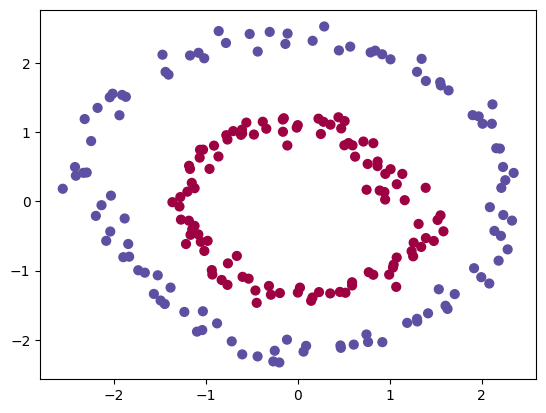

In [9]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [8]:
# Force reload the module to get updated version
import importlib
import reg_utils
importlib.reload(reg_utils)
from reg_utils import load_2D_dataset, plot_decision_boundary, predict_dec

In [10]:
def build_model(lambd=0.0,keep_prob=1.0):
    model = Sequential()
    model.add(Dense(20,activation='relu',input_shape=(2,),kernel_regularizer=l2(lambd) if lambd > 0 else None))

    if keep_prob < 1.0:
        model.add(Dropout(1-keep_prob))

    model.add(Dense(3,activation='relu',
              kernel_regularizer=l2(lambd) if lambd > 0 else None))
    
    if keep_prob < 1.0:
        model.add(Dropout(1-keep_prob))

    model.add(Dense(1,activation='sigmoid',
                    kernel_regularizer=l2(lambd) if lambd > 0 else None))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.3),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [13]:
def train_and_plot(lambd=0.0,keep_prob=1.0):
    model=build_model(lambd,keep_prob)
    # Fix: Use transposed data for training to match the expected shape
    history = model.fit(train_X.T, train_Y.T, epochs=150, verbose=0)

    # Plot loss
    plt.plot(history.history['loss'])
    plt.title(f"Loss curve (λ={lambd}, keep_prob={keep_prob})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # Accuracy - data is already transposed here
    train_acc = model.evaluate(train_X.T, train_Y.T, verbose=0)[1]
    test_acc = model.evaluate(test_X.T, test_Y.T, verbose=0)[1]
    print(f"Train Accuracy: {train_acc*100:.2f}%")
    print(f"Test Accuracy: {test_acc*100:.2f}%")

    # Plot decision boundary - use original data format
    plot_decision_boundary(lambda x: model.predict(x).flatten(), train_X, train_Y)
    plt.title(f"Decision Boundary (λ={lambd}, keep_prob={keep_prob})")
    plt.show()

Without regularization


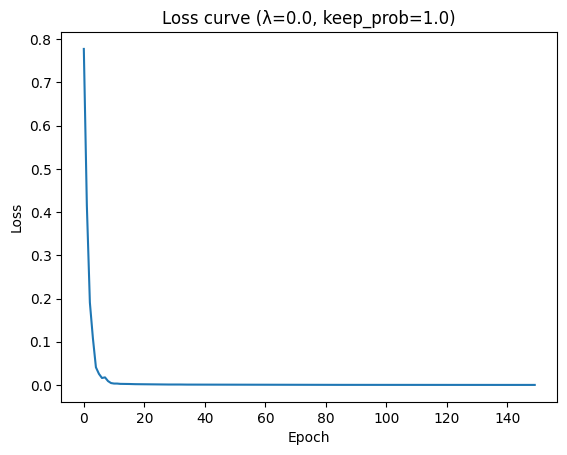

Train Accuracy: 100.00%
Test Accuracy: 100.00%
14814/14814 ━━━━━━━━━━━━━━━━━━━━ 7s 444us/step
14814/14814 ━━━━━━━━━━━━━━━━━━━━ 7s 444us/step


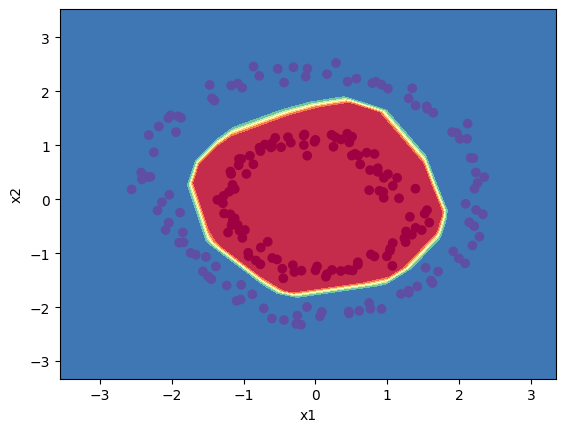

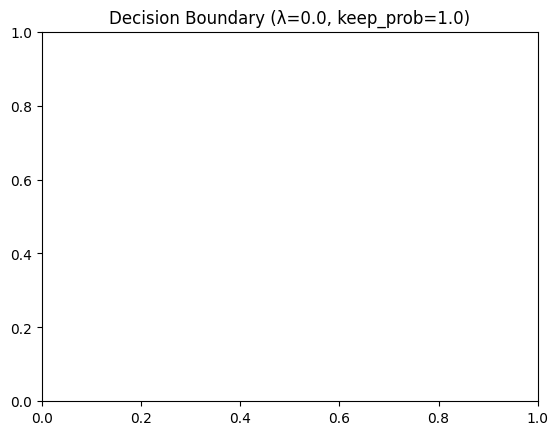

With L2 regularization (λ=0.7)


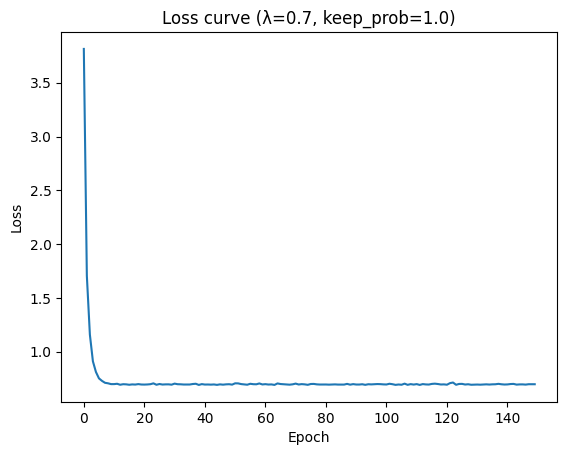

Train Accuracy: 50.24%
Test Accuracy: 50.00%
14814/14814 ━━━━━━━━━━━━━━━━━━━━ 7s 444us/step
14814/14814 ━━━━━━━━━━━━━━━━━━━━ 7s 444us/step


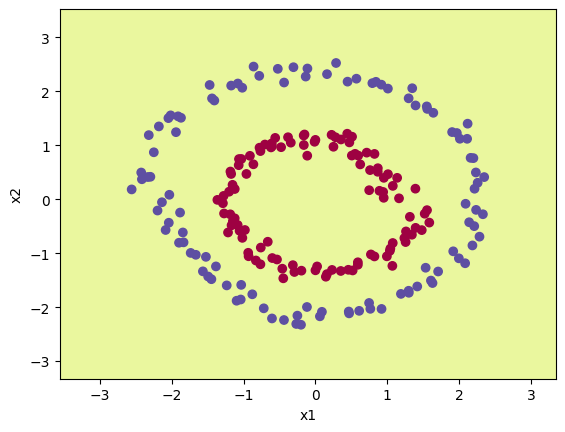

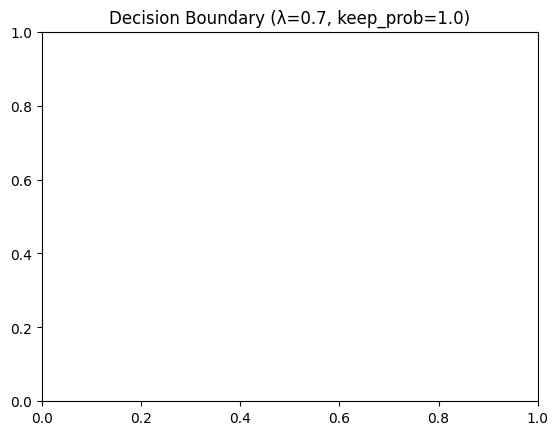

With Dropout (keep_prob=0.86)


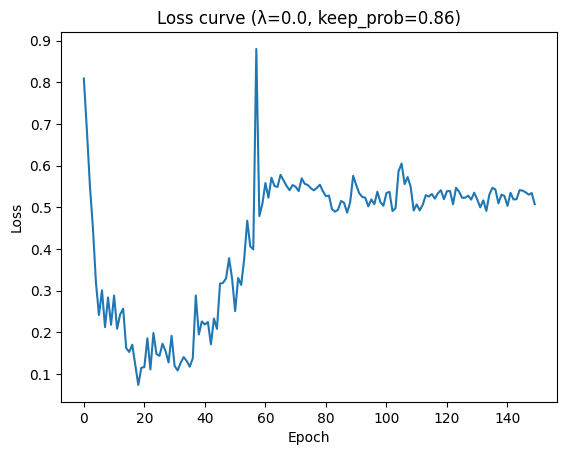

Train Accuracy: 77.25%
Test Accuracy: 78.00%
14814/14814 ━━━━━━━━━━━━━━━━━━━━ 7s 442us/step
14814/14814 ━━━━━━━━━━━━━━━━━━━━ 7s 442us/step


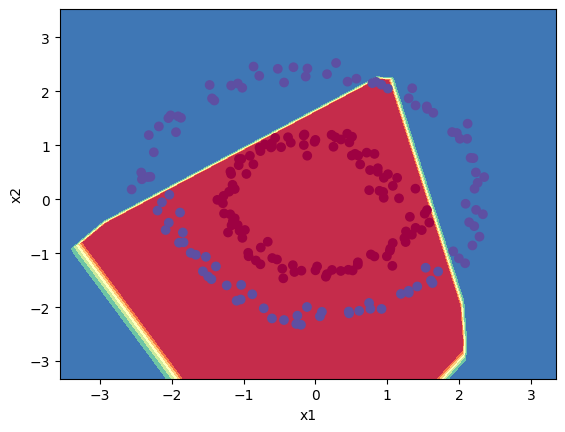

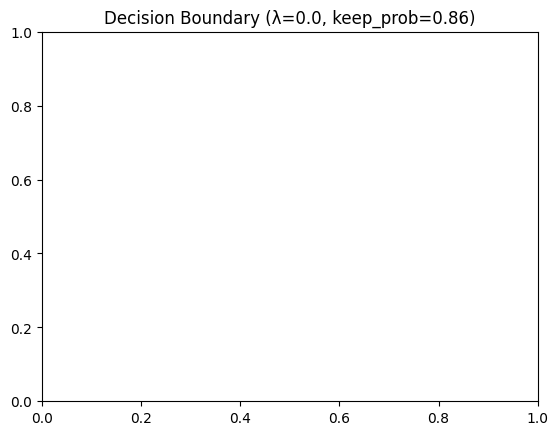

In [14]:
# Cell 4: Try different scenarios
print("Without regularization")
train_and_plot()

print("With L2 regularization (λ=0.7)")
train_and_plot(lambd=0.7)

print("With Dropout (keep_prob=0.86)")
train_and_plot(keep_prob=0.86)
